# Linear Models

Usually very fast, linear models are frequentelly used in practice. The objective here is to induce a linear model using the input features.

Linear Models for Regression assumes the following format:

y_hat = w[0]*x[0] + ... + w[p]*x[p] + b

in which, y_hat is the predicted target value, p is the number of features, w and b are the set of parameters (slope and error, respectively) and x is the set of features. The role of a ML algorithm is to identify optimal values for each w[p].

In the example, below there is a linear model fot a dataset with one feature.

In [5]:
import mglearn

w[0]: 0.393906  b: -0.031804


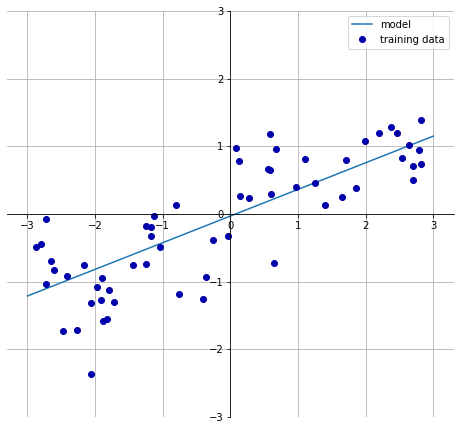

In [6]:
mglearn.plots.plot_linear_regression_wave()

## Examples with the (extended) Boston Housing dataset

In [37]:
import mglearn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [14]:
X,y = mglearn.datasets.load_extended_boston()

### Linear Regression (aka Ordinary Least Squares)

Objective: Find the parameters w and b that minimizes mean squared error.

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [17]:
lr = LinearRegression().fit(X_train, y_train)

In [18]:
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.95
Test set score: 0.61


### Ridge Regression

Ridge regression uses the same formula as OLS, but it's objective goes beyond, so that, the magnitude of the coefficients (w) should be as small as possible. This way, each feature must have as little effect as possible on the outcome. This is called regularization (L2).

In [19]:
from sklearn.linear_model import Ridge

In [20]:
ridge = Ridge().fit(X_train, y_train)

In [22]:
print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test, y_test)))

Training set score: 0.89
Test set score: 0.75


As expected, Ridge's training set score is lower than OLS's one because Ridges is less prone to overfitting. Here we have a less complex model with a better generalization (compate the test set scores).

Ridge allows to control bias-variance trade-off through the parameter alpha. With higher values for alpha, we induce less complex models (higher bias or lower variance).

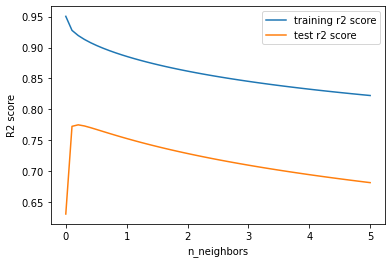

In [97]:
training_r2 = []
test_r2 = []

alpha_range = [round (x,4) for x in np.linspace(0.001, 5, 50).reshape(-1, 1).ravel().tolist()]

for alpha in alpha_range:
    clf = Ridge(alpha=alpha)
    clf.fit(X_train, y_train)
    training_r2.append(clf.score(X_train, y_train))
    test_r2.append(clf.score(X_test, y_test))

plt.plot(alpha_range, training_r2, label="training r2 score")
plt.plot(alpha_range, test_r2, label="test r2 score")
plt.ylabel("R2 score")
plt.xlabel("n_neighbors")
plt.legend();

In this case, alpha=0.21 seems to be a good value for alpha as we minimizes the (absolute) difference between training and test's r2 scores. For higher values of alpha, we have lower values of w. Also, it's interesting to point out that that, with more data, regularization becomes less important (see below).

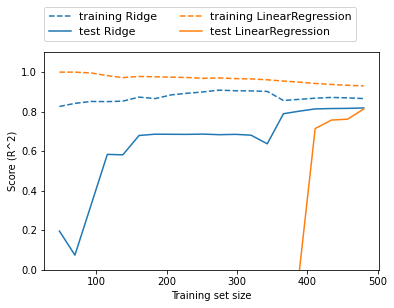

In [49]:
mglearn.plots.plot_ridge_n_samples()

As we increase the volume of training data, the differences between LinearRegression and Ridge decreases.

### Lasso

Is an alternative to Ridge, with L1 regularization. Here, coefficients can be exactly zero. Therefore, it applies an automatic feature selection.

In [51]:
from sklearn.linear_model import Lasso

In [52]:
lasso = Lasso().fit(X_train, y_train)

In [60]:
print("Training set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test)))
print("\nNumber of features (original): {}".format(X.shape[1]))
print("Number of features used: {}".format(np.sum(lasso.coef_ != 0)))

Training set score: 0.29
Test set score: 0.21

Number of features (original): 104
Number of features used: 4


With alpha=1.0 the Lasso induces a model with very low r2 score. This is an indication of underfitting. Fortunatelly, we can try to reduce this effect by changing the alpha vale to lower values.

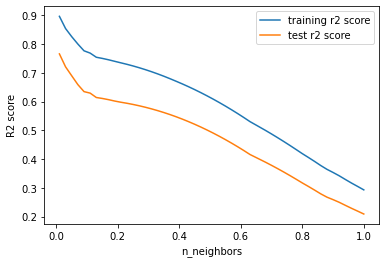

In [78]:
training_r2 = []
test_r2 = []

alpha_range = [round (x,2) for x in np.linspace(0.005, 1, 50).reshape(-1, 1).ravel().tolist()]

for alpha in alpha_range:
    clf = Lasso(alpha=alpha, max_iter=10000)
    clf.fit(X_train, y_train)
    training_r2.append(clf.score(X_train, y_train))
    test_r2.append(clf.score(X_test, y_test))

plt.plot(alpha_range, training_r2, label="training r2 score")
plt.plot(alpha_range, test_r2, label="test r2 score")
plt.ylabel("R2 score")
plt.xlabel("n_neighbors")
plt.legend();

In [93]:
lasso = Lasso(alpha=0.01, max_iter=10000).fit(X_train, y_train)

In [95]:
print("Training set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test)))
print("\nNumber of features (original): {}".format(X.shape[1]))
print("Number of features used: {}".format(np.sum(lasso.coef_ != 0)))

Training set score: 0.90
Test set score: 0.77

Number of features (original): 104
Number of features used: 33


In this case, alpha=0.01 seems to works well. Lasso outperforms Ridge and OLS with fewer number of features (only 33). With a large amount of features Lasso seems to perform better than Ridge. Also, Lasso provides a model which is easier to interpret. When in doubt, we can also combine the penalties of Lasso and Ridge through ElasticNet at the cost of having two parameters to adjust (L1 and L2 regularization).